<a href="https://colab.research.google.com/github/am-1t/fast-ai/blob/main/fastai_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#!pip install -Uqq fastai 'duckduckgo_search>=6.2'
from duckduckgo_search import DDGS

In [2]:
from fastcore.all import *
import time, json
from fastdownload import download_url
from fastai.vision.all import *

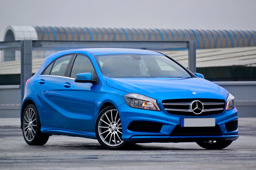

In [3]:
def search_image(keywords, max_images=200):
  return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')

download_url(search_image('bike', max_images=1)[0],'bike.jpg' ,show_progress=False)
Image.open('bike.jpg').to_thumb(256, 256)

download_url(search_image('car', max_images=1)[0], 'car.jpg', show_progress=False)
Image.open('car.jpg').to_thumb(256, 256)

In [4]:
searches = 'bike', 'car'
path = Path('bike_or_not')
for item in searches:
  dest = (path/item)
  dest.mkdir(exist_ok=True, parents=True)
  download_images(dest, urls=search_image(f'{item} photo'))
  time.sleep(5)
  resize_images(path/item, max_size=200, dest=path/item)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [5]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

8

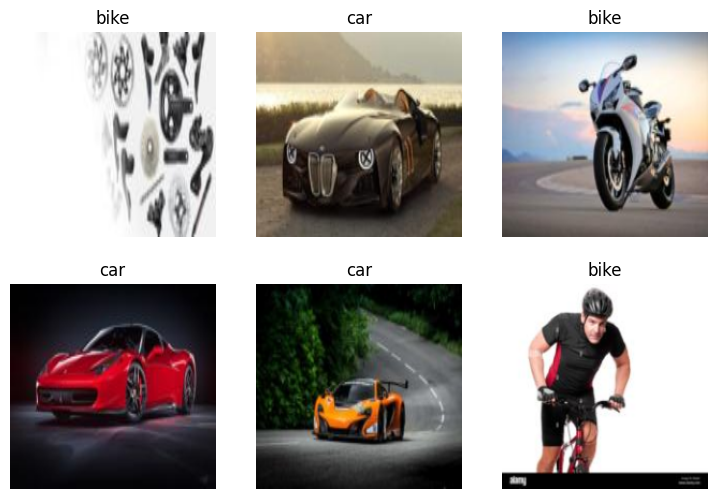

In [6]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
  	get_items=get_image_files,
  	splitter=RandomSplitter(valid_pct=0.2, seed=42),
  	get_y=parent_label,
    item_tfms=Resize(192, method='squish'),

).dataloaders(path, bs=32)
dls.show_batch(max_n=6)

In [7]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 102MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.767356,0.143176,0.041096,00:40


epoch,train_loss,valid_loss,error_rate,time
0,0.125691,0.094044,0.041096,00:59
1,0.082626,0.138354,0.041096,00:59
2,0.059835,0.169352,0.041096,00:58


In [9]:
is_bike,_, probs = learn.predict(PILImage.create('bike.jpg'))
print(f"This is a: {is_bike}.")
print(f"Probability it's a bike: {probs[0]:.2f}")

This is a: bike.
Probability it's a bike: 1.00
